# Some simple tests to ensure smooth functioning of the code

In [1]:
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
import elvet
import matplotlib.pyplot as plt
#import pandas as pd

from model import model

 Elvet: If you use Elvet in research, please cite arXiv:2103.14575


### Defining a dictionary of parameters and initializing model

In [2]:
test_params1 = {'g1': 0.4632, 'g2': 0.6485, 'yt': 0.92849, 'yb': 0.0167, 'mHsq': 0.286270859792, 'mSsq': 4.4819542, 'lmbd': -0.6888422590446, 'lmbd_SH': 10.90, 'lmbd_S': 1, 'N': 0.5, 'vevh': 3.08204}

test_model1 = model(test_params1, bsm = True, eft = False)

In [3]:
test_params2 = {'g1': 0.4632, 'g2': 0.6485, 'yt': 0.92849, 'yb': 0.0167, 'mHsq': -1.19109375, 'mSsq': 0.0625, 'lmbd': 0.2582, 'lmbd_SH': 0.85, 'lmbd_S': 1, 'N': 4, 'vevh': 3.08204}

test_model2 = model(test_params2, bsm = True, eft = False)

In [16]:
for i in range(len(test_model1.field_object_list)):
    print(test_model1.field_object_list[i].name)

sm_higgs
goldstone
bsm_scalar
w_boson_t
w_boson_l
z_boson_t
z_boson_l
photon_l
t_quark
b_quark


### Calling higgs and goldstone masses as functions of $(h, T)$ and plotting

In [4]:
hy = elvet.box((0.0, 3.2, 3200)) 
h0 = tf.zeros((len(hy), 1), dtype=tf.float32)

mh1 = lambda h, T: test_model1.field_object_list[0].mass_sq(h, T)
mG1 = lambda h, T: test_model1.field_object_list[1].mass_sq(h, T)

mh2 = lambda h, T: test_model2.field_object_list[0].mass_sq(h, T)
mG2 = lambda h, T: test_model2.field_object_list[1].mass_sq(h, T)

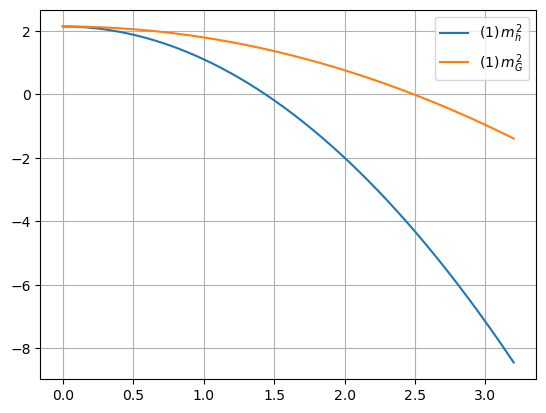

In [6]:
plt.plot(hy, mh1(hy, 125/80), label="$(1)\,m_h^2$")
plt.plot(hy, mG1(hy, 125/80), label="$(1)\,m_G^2$")
plt.grid(True)
plt.legend()

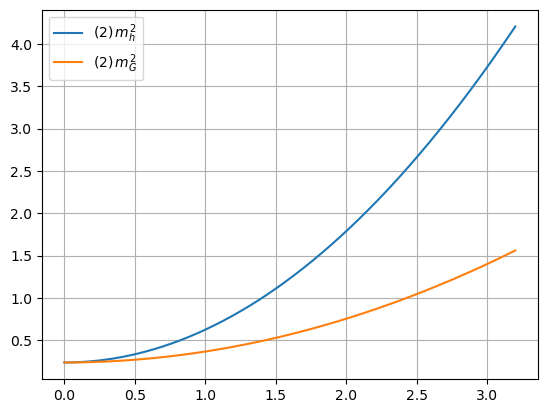

In [7]:
plt.plot(hy, mh2(hy, 125/80), label="$(2)\,m_h^2$")
plt.plot(hy, mG2(hy, 125/80), label="$(2)\,m_G^2$")
plt.grid(True)
plt.legend()

### Calling potential functions

#### With correct set of inputs

In [7]:
test_model1.cw_potential(hy,140,**{'scheme':"MS-Bar", 'scale':2.1595})

<tf.Tensor: shape=(3200, 1), dtype=float32, numpy=
array([[1.1265235],
       [1.1265235],
       [1.126524 ],
       ...,
       [1.9444337],
       [1.9461623],
       [1.9478958]], dtype=float32)>

#### Intentional mistake

In [8]:
test_model1.cw_potential(hy,90,**{'scheme':"mistake"})

Unknown renormalization scheme entered. Expected 'MS-Bar' or 'On-shell'


### Error expected due to incomlete function definitions

In [9]:
test_model1.cw_potential_deriv(hy,90,**{'scale':2.1595, 'scheme':'MS-Bar'})

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [10]:
test_model1.finite_T_potential(hy,100,False)-test_model1.finite_T_potential(h0,100,False)

<tf.Tensor: shape=(3200, 1), dtype=float32, numpy=
array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.97644997],
       [0.97696304],
       [0.9774761 ]], dtype=float32)>

### Plotting potential functions

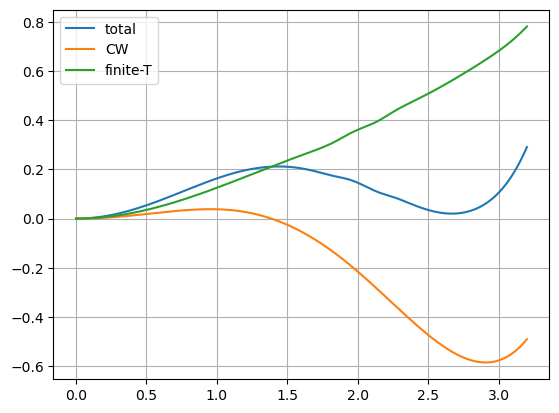

In [14]:
plt.plot(hy, (test_model1.total_potential(hy, 90, False, **{'scheme':"MS-Bar", 'scale':2.1595}) - test_model1.total_potential(h0, 90, False, **{'scheme':"MS-Bar", 'scale':2.1595})), label="total")
plt.plot(hy, (test_model1.cw_potential(hy, 90, **{'scheme':"MS-Bar", 'scale':2.1595}) - test_model1.cw_potential(h0, 90, **{'scheme':"MS-Bar", 'scale':2.1595})), label="CW" )
plt.plot(hy, (test_model1.finite_T_potential(hy, 90, False) - test_model1.finite_T_potential(h0, 90, False)), label="finite-T" )
plt.legend()
plt.grid(True)

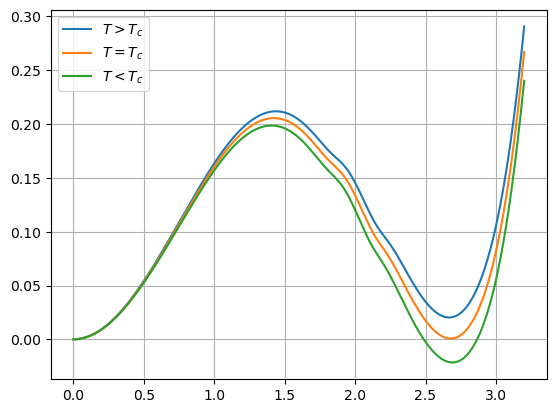

In [20]:
plt.plot(hy, (test_model1.total_potential(hy, 90, False, **{'scheme':"MS-Bar", 'scale':2.1595}) - test_model1.total_potential(h0, 90, False, **{'scheme':"MS-Bar", 'scale':2.1595})), label="$T>T_c$")
plt.plot(hy, (test_model1.total_potential(hy, 89.3, False, **{'scheme':"MS-Bar", 'scale':2.1595}) - test_model1.total_potential(h0, 89.3, False, **{'scheme':"MS-Bar", 'scale':2.1595})), label="$T=T_c$")
plt.plot(hy, (test_model1.total_potential(hy, 88.5, False, **{'scheme':"MS-Bar", 'scale':2.1595}) - test_model1.total_potential(h0, 88.5, False, **{'scheme':"MS-Bar", 'scale':2.1595})), label="$T<T_c$")
plt.legend()
plt.grid(True)